# Exploratory data analysis (EDA)
- The dataset includes 26 anonymized clinical features (A-Z) and an ordinal class label
- Each feature has approximately 20% missing data
- Significant missing data in the 'class' column of the training set

# Data preprocessing
- Remove rows with missing 'class' values
- Fill missing value with mean of each feature

# Model selection
- Using Support Vector Classifier(SVC)
- SVC is effective in high-dimentional spaces, making it ideal for 26-feature dataset

# Model training
- Utilized Scikit-learn to train the SVC model

# Hyperparameter tuning
- Applied GridSearchCV for comprehensive hyperparameter optimization
- experimenting with different configurations for 'decision_function_shape', choosing between 'ovr' and 'ovo'

# Evaluation
- Macro f1 score 
  - We achieved a notable macro F1 score of 0.836
  - Indicating a strong balance between precision and recall across all classes
- confusion matrix
  - plot confusion matrix to inspect model's performance across difference classes

# Error analysis
The model misclassify instances of a particular class(e.g., 0.0) becauseof limted data available for this category. We can improve it by reblancing the dataset or add more training data for underrepresented classes.

In [1]:
import pandas as pd
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [2]:
df_train.dropna(subset=['class'], inplace=True)

In [3]:
columns = list(df_train.columns)
features = columns[:-1]
df_train['class'].unique()

array([2., 1., 3., 0.])

In [4]:
# missing_values=train_df.isnull().sum()
# missing_values[missing_values>0]/len(train_df)*100

In [5]:
mean=df_train.mean(axis=0, skipna=True, numeric_only=True)
df_train.fillna(mean, inplace=True)
df_test.fillna(mean, inplace=True)

In [6]:
x_train = df_train[features]
y_train = df_train['class']
x_test = df_test[features]
y_test = df_test['class']

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
SEED = 0
param_grid = {
    'random_state': [SEED],
    'decision_function_shape': ['ovr', 'ovo'],
}

svc = SVC()
clf = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5)
clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovr', 'ovo'],
                         'random_state': [0]})

In [9]:
clf.best_params_

{'decision_function_shape': 'ovr', 'random_state': 0}

In [10]:
prediction = clf.predict(x_test)

In [19]:
from sklearn.metrics import f1_score
print(f"f1_score: {f1_score(y_test, prediction, average='macro')}")

f1_score: 0.8363165166074655


In [18]:

from sklearn.metrics import classification_report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         0.0       0.83      0.50      0.62        40
         1.0       0.91      0.91      0.91       475
         2.0       0.93      0.95      0.94      1186
         3.0       0.89      0.85      0.87       299

    accuracy                           0.92      2000
   macro avg       0.89      0.80      0.84      2000
weighted avg       0.92      0.92      0.92      2000



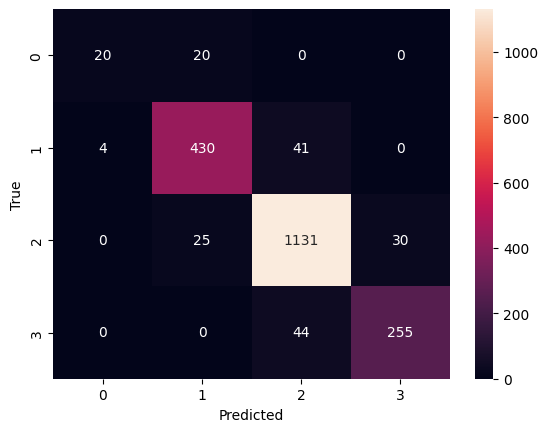

In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
cf_mat = confusion_matrix(y_test, prediction)

sns.heatmap(cf_mat, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()